In [1]:
import numpy as np
from gsmmutils import ModelValidator, MyModel
from cobra.flux_analysis import pfba, flux_variability_analysis as fva
import gsmmutils
gsmmutils.DATA_PATH = "../data"
from cobra.io import to_json, save_json_model
from utils import *
import logging
logging.getLogger('cobra').setLevel(logging.CRITICAL)
logging.getLogger('gsmmutils').setLevel(logging.CRITICAL)
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

In [2]:
original_model = MyModel(r"../data/model_with_media.xml", "e_Biomass__cytop")

Loading

Reactions: 4583
Metabolites: 3732
Genes: 1693
Model loaded


In [3]:
original_model.summary()

Running pFBA


Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__dra,6.745,0,0.00%
C00009__extr,EX_C00009__dra,0.03147,0,0.00%
C00011__extr,EX_C00011__dra,8.21,1,99.75%
C00059__extr,EX_C00059__dra,0.02092,0,0.00%
C00080__extr,EX_C00080__dra,0.05308,0,0.00%
C00120__extr,EX_C00120__dra,0.0007589,10,0.09%
C00205__extr,EX_C00205__dra,95.86,0,0.00%
C00244__extr,EX_C00244__dra,0.5173,0,0.00%
C00305__extr,EX_C00305__dra,0.0001463,0,0.00%
C00378__extr,EX_C00378__dra,0.0004362,12,0.06%


DM_C08601__chlo ('EX_C00205__dra', 'EX_C00011__dra')
DM_C08601__chlo ('EX_C00205__dra', 'EX_C00009__dra')
DM_C08601__chlo ('EX_C00205__dra', 'EX_C00244__dra')
DM_C08601__chlo ('EX_C00205__dra', 'EX_C00059__dra')
DM_C08601__chlo ('EX_C00011__dra', 'EX_C00009__dra')
DM_C08601__chlo ('EX_C00011__dra', 'EX_C00244__dra')
DM_C08601__chlo ('EX_C00011__dra', 'EX_C00059__dra')
DM_C08601__chlo ('EX_C00009__dra', 'EX_C00244__dra')
DM_C08601__chlo ('EX_C00009__dra', 'EX_C00059__dra')
DM_C08601__chlo ('EX_C00244__dra', 'EX_C00059__dra')
DM_C02094__chlo ('EX_C00205__dra', 'EX_C00011__dra')
DM_C02094__chlo ('EX_C00205__dra', 'EX_C00009__dra')
DM_C02094__chlo ('EX_C00205__dra', 'EX_C00244__dra')
DM_C02094__chlo ('EX_C00205__dra', 'EX_C00059__dra')
DM_C02094__chlo ('EX_C00011__dra', 'EX_C00009__dra')
DM_C02094__chlo ('EX_C00011__dra', 'EX_C00244__dra')
DM_C02094__chlo ('EX_C00011__dra', 'EX_C00059__dra')
DM_C02094__chlo ('EX_C00009__dra', 'EX_C00244__dra')
DM_C02094__chlo ('EX_C00009__dra', 'EX_C00059_

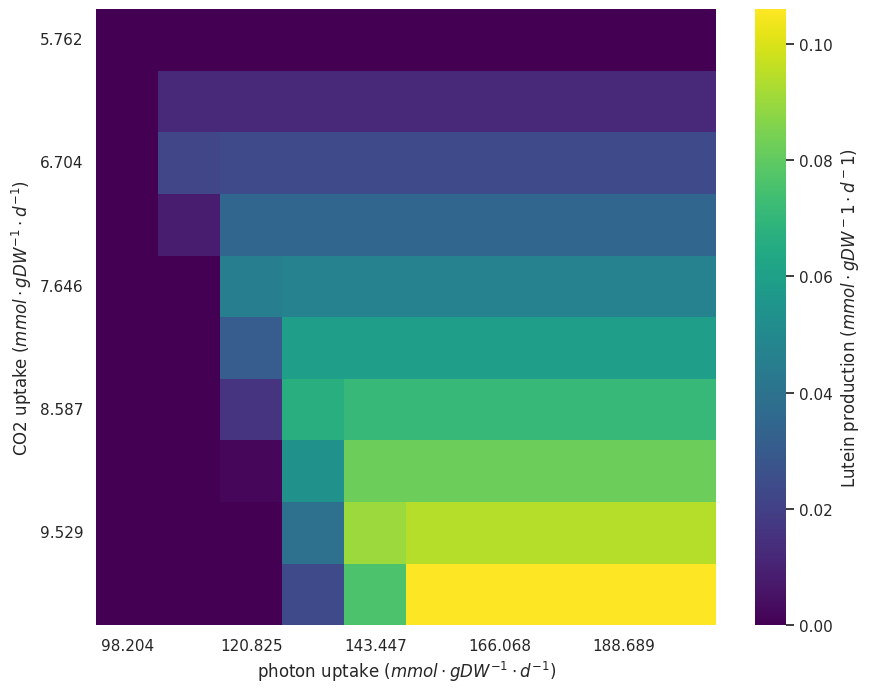

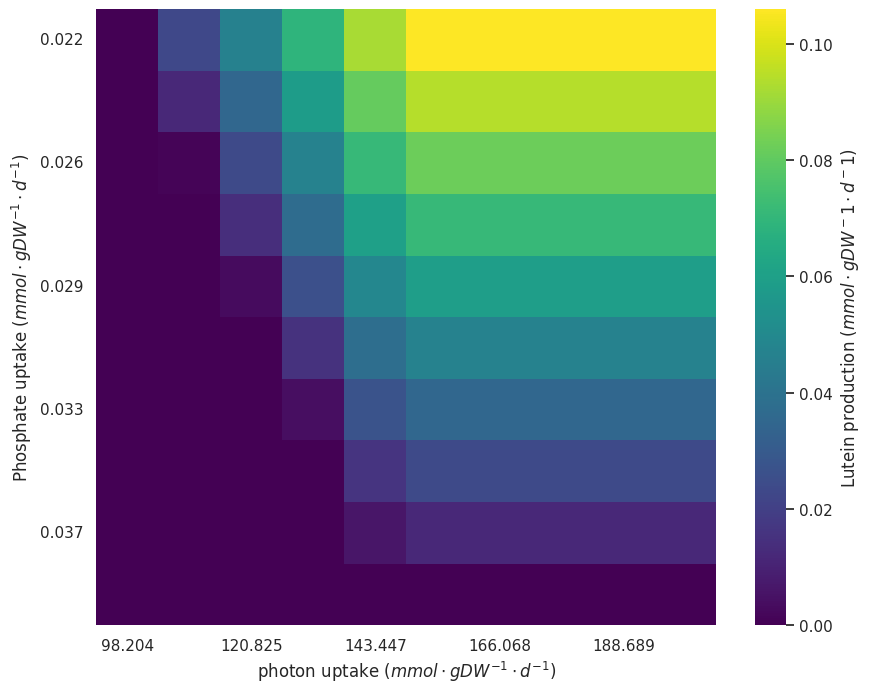

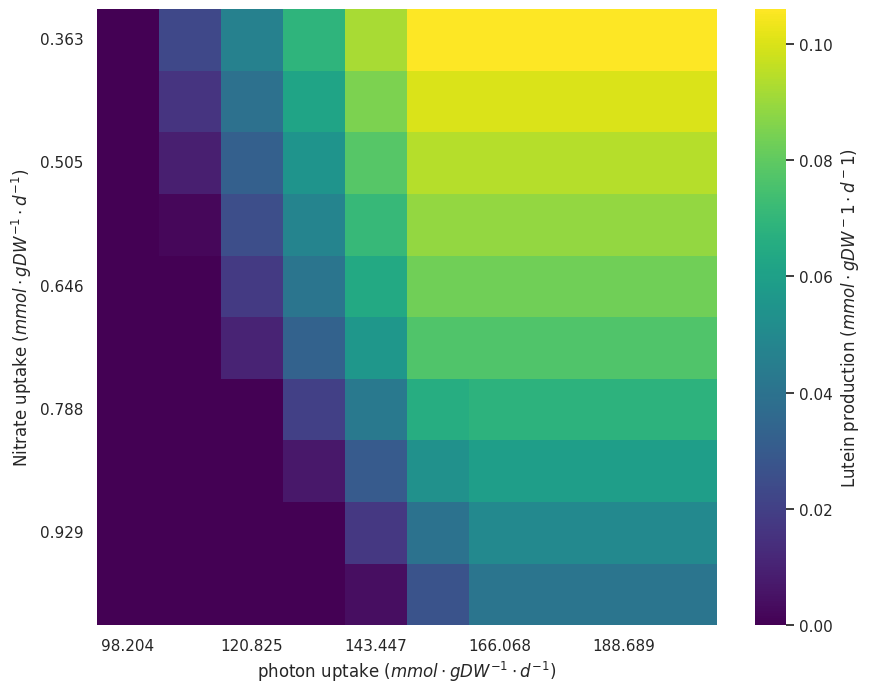

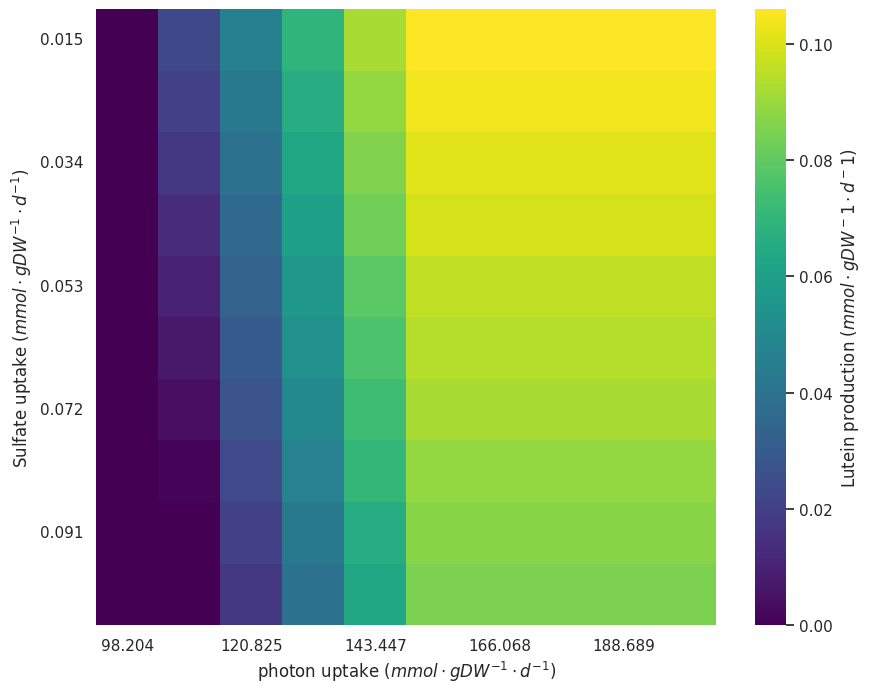

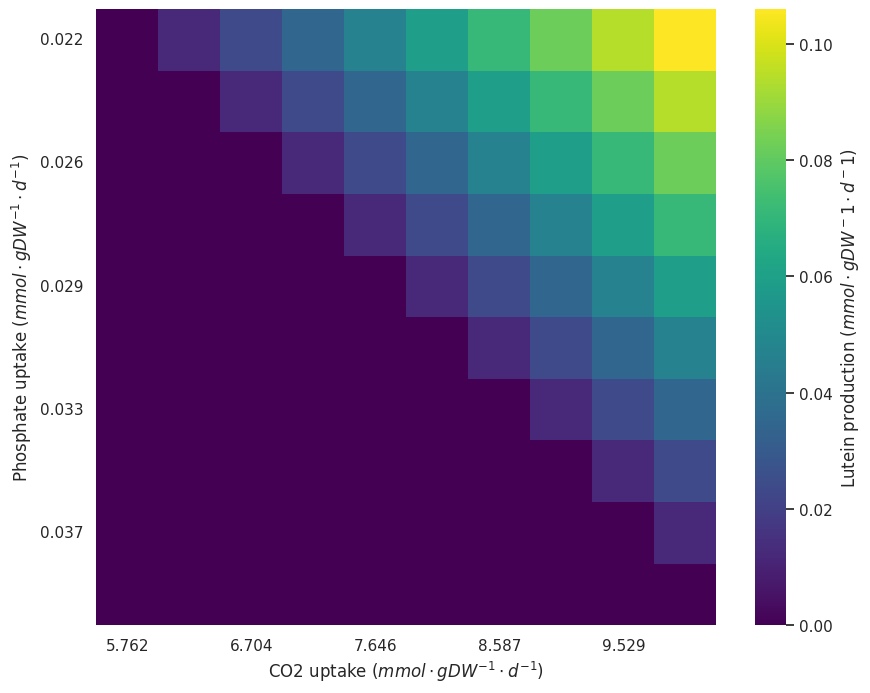

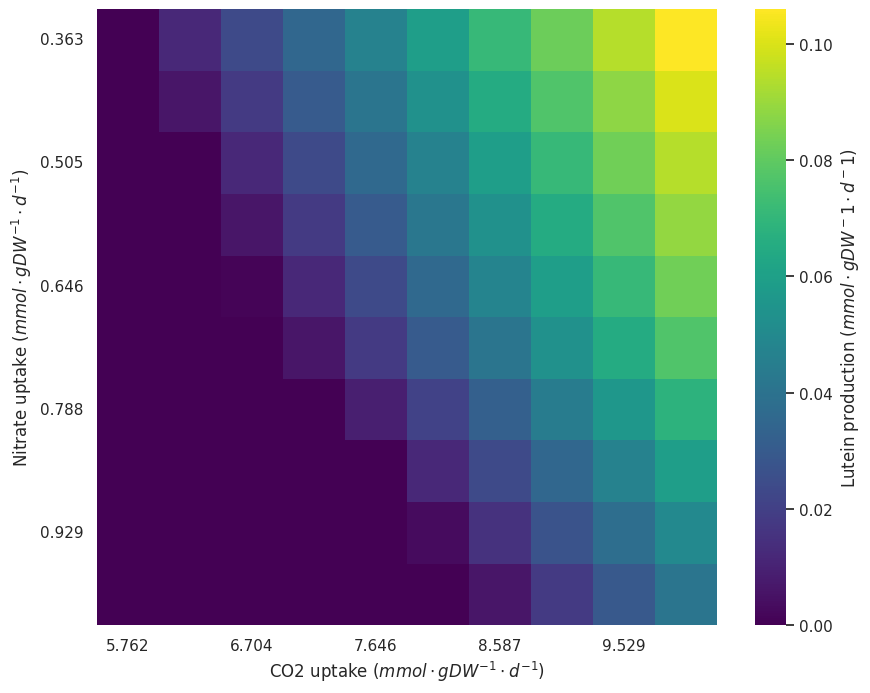

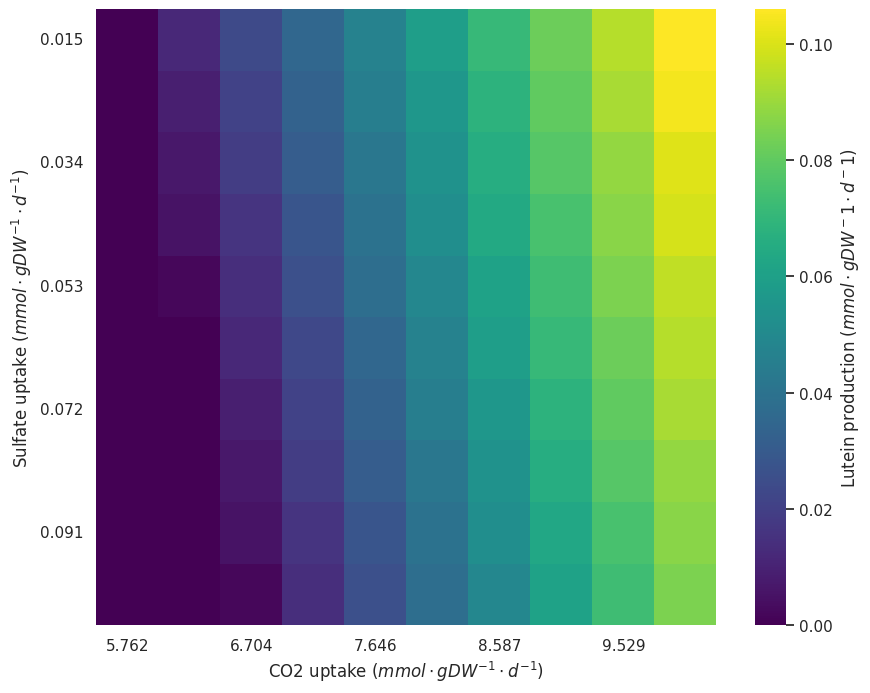

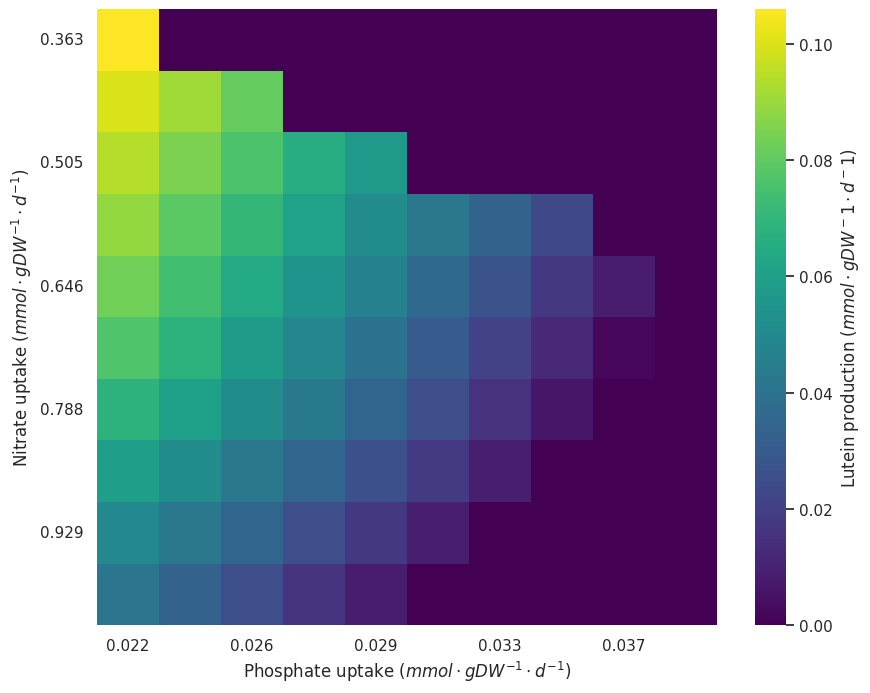

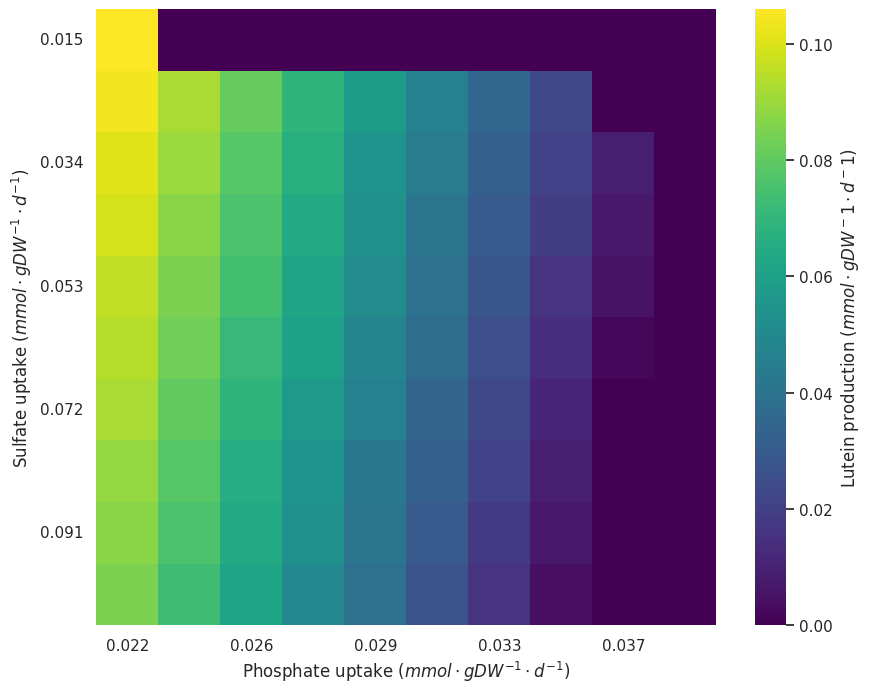

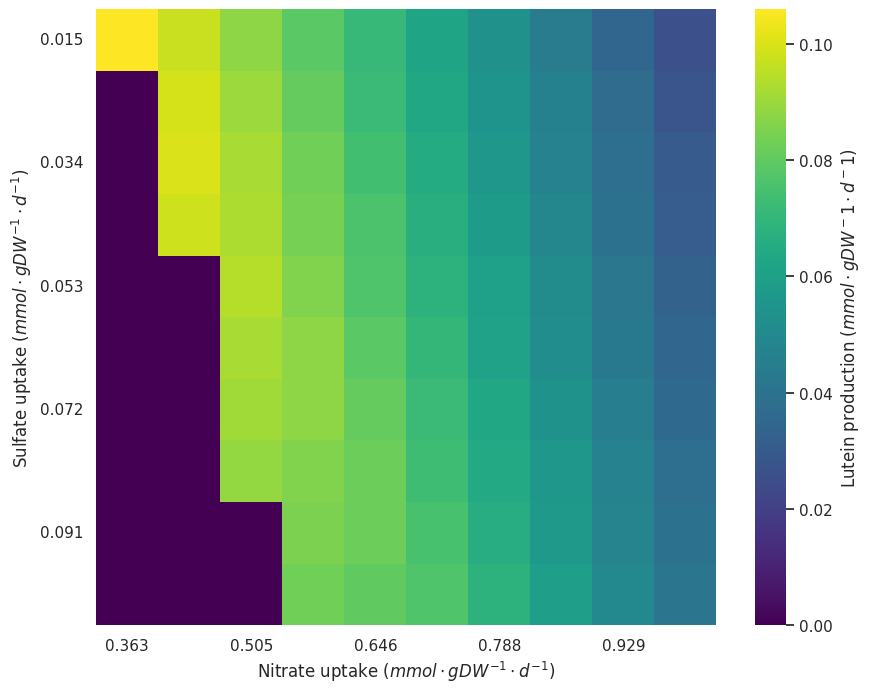

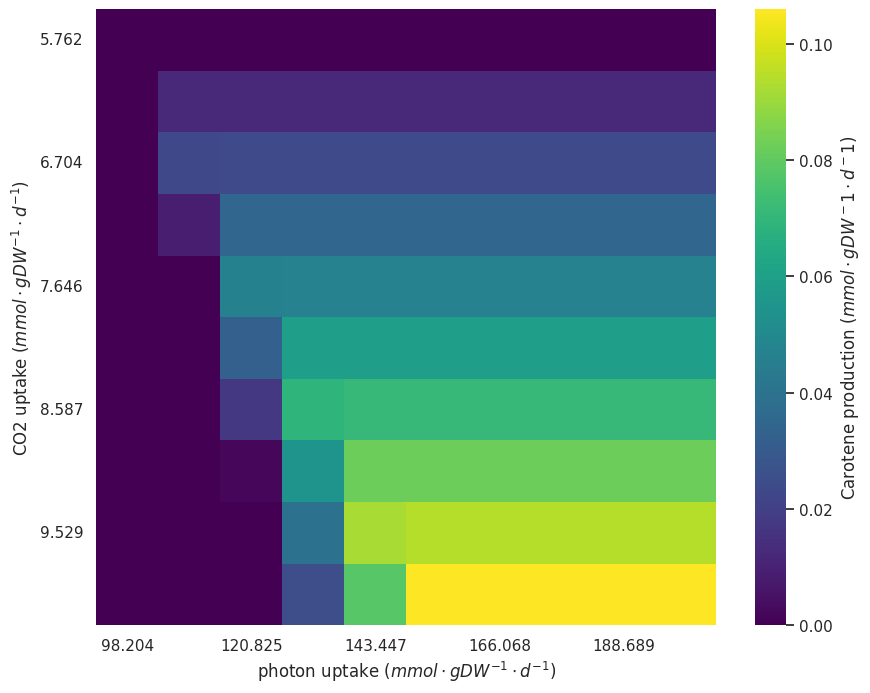

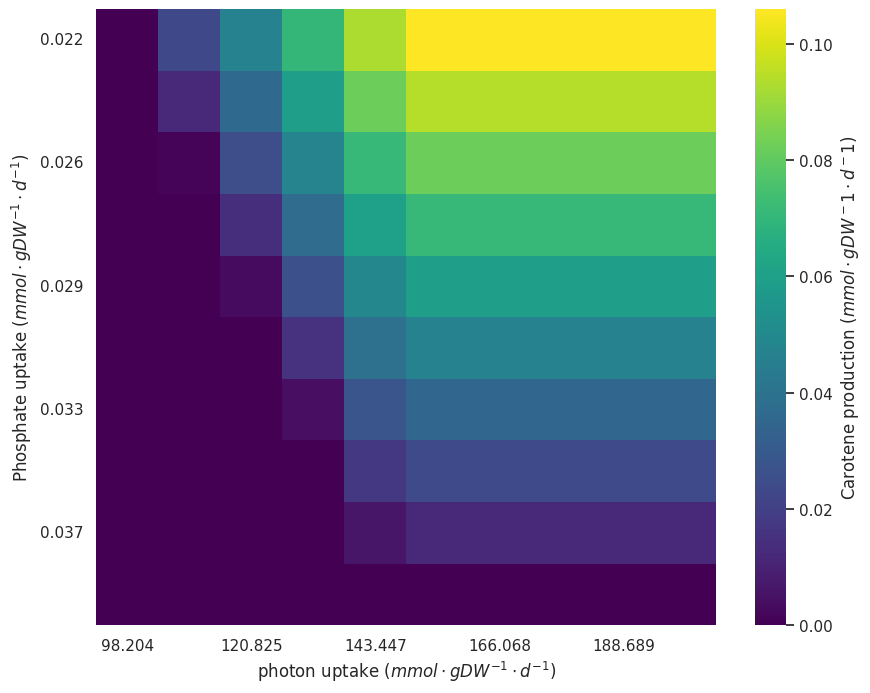

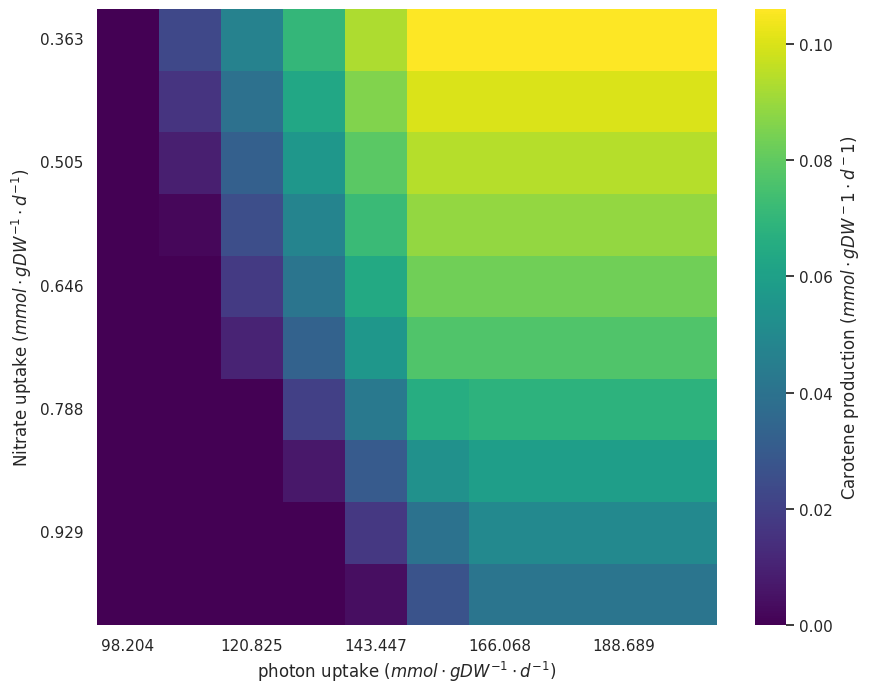

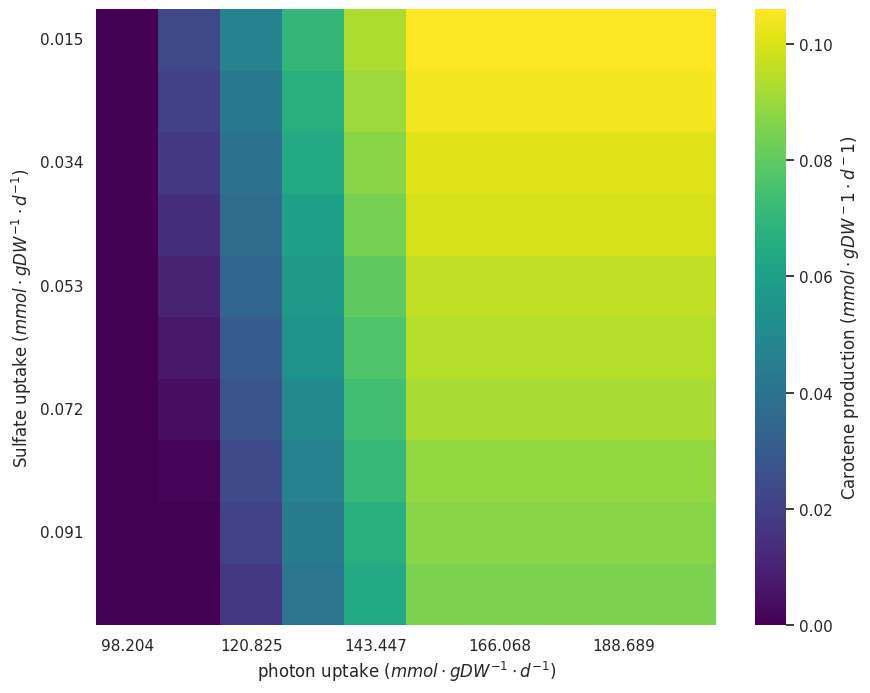

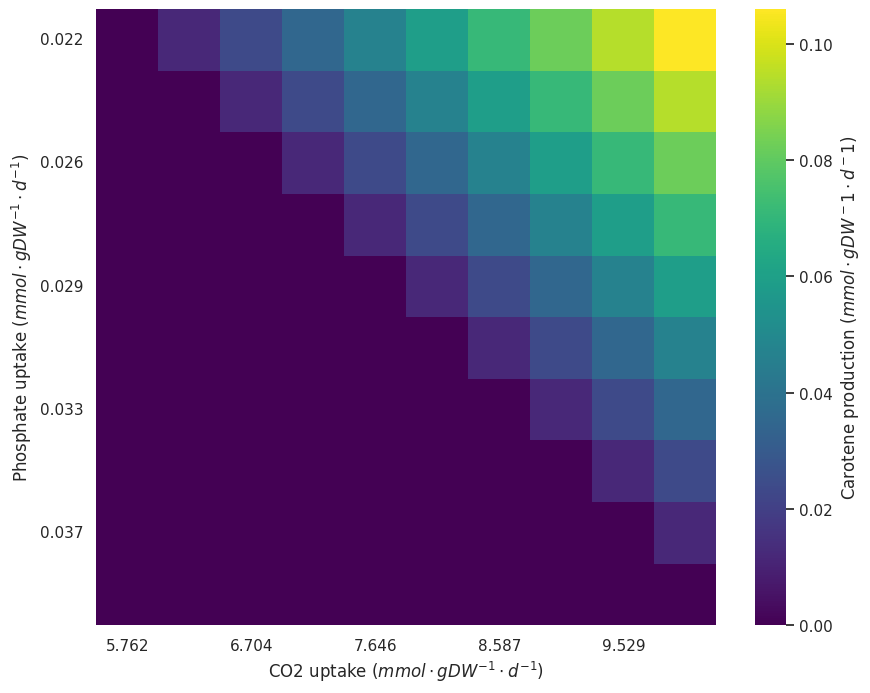

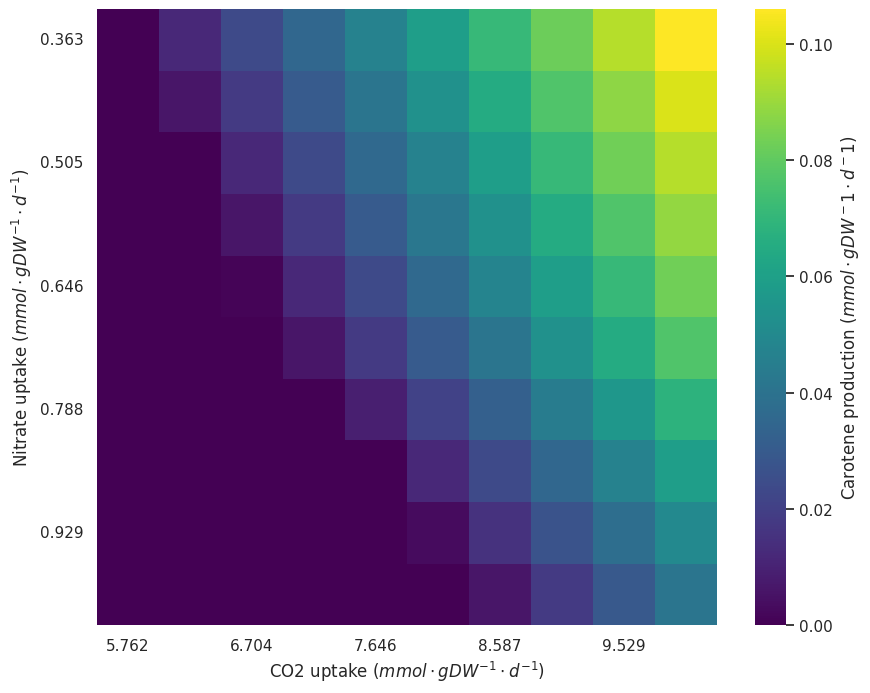

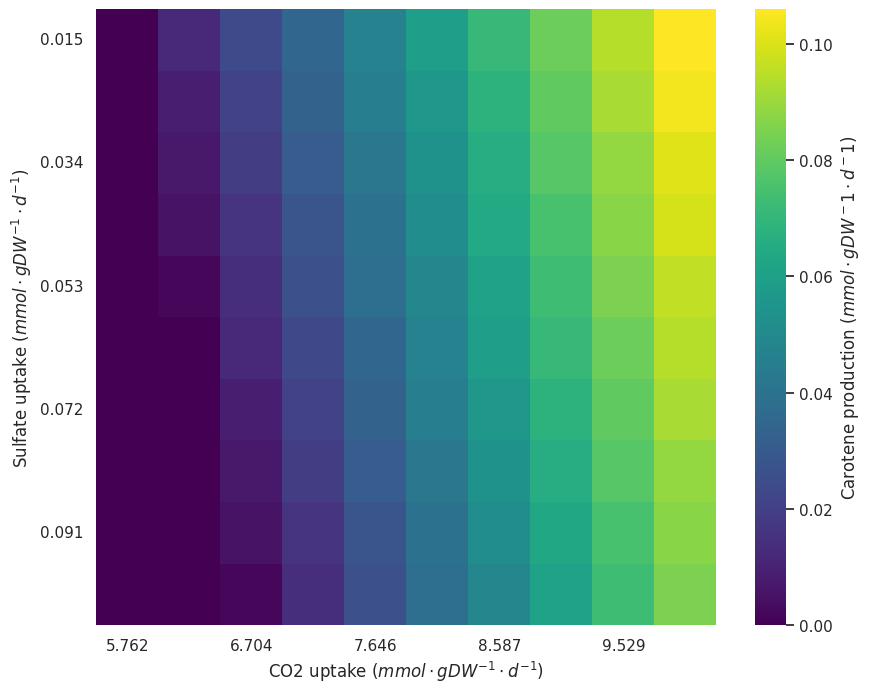

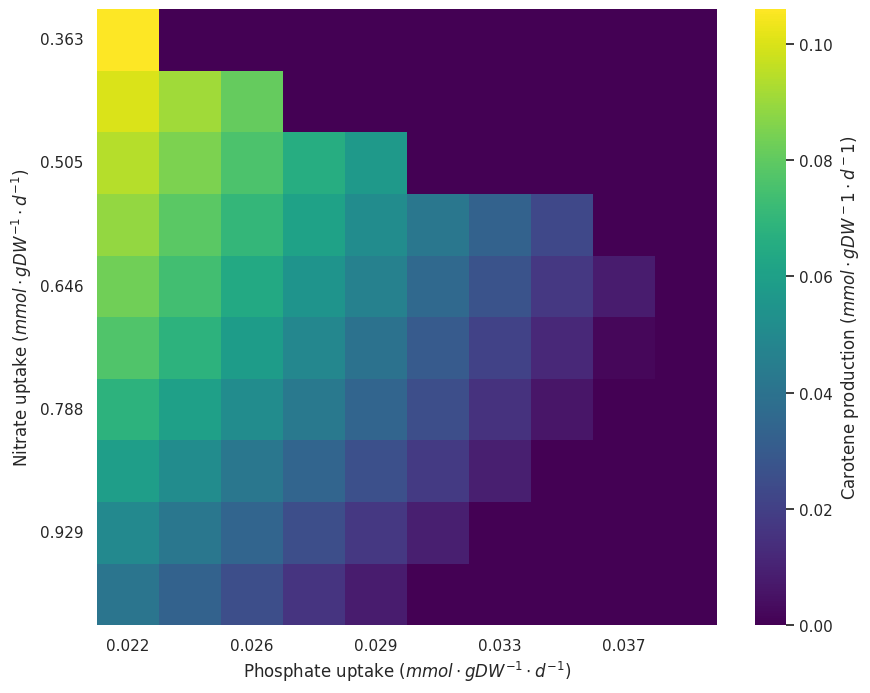

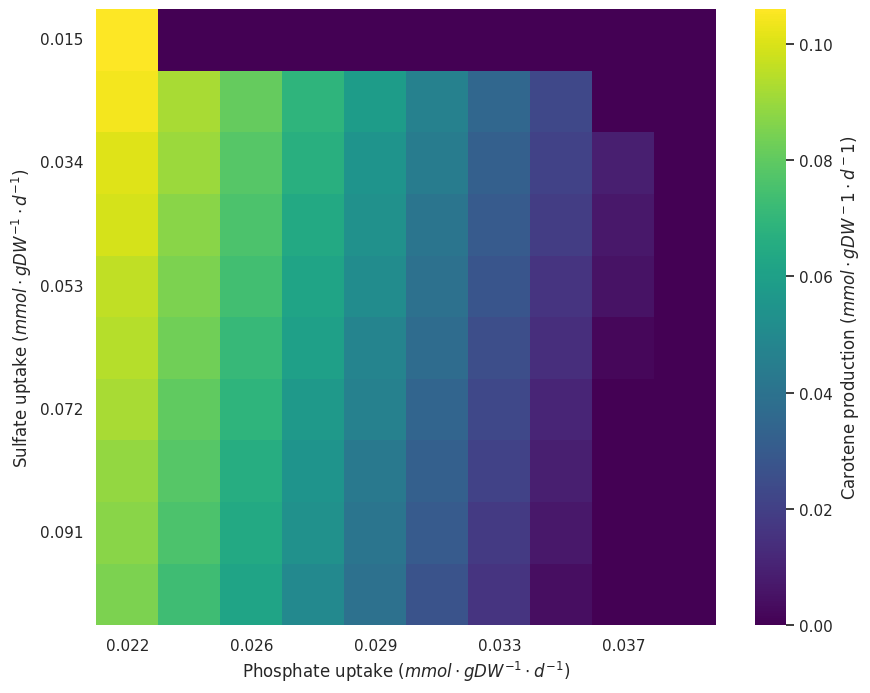

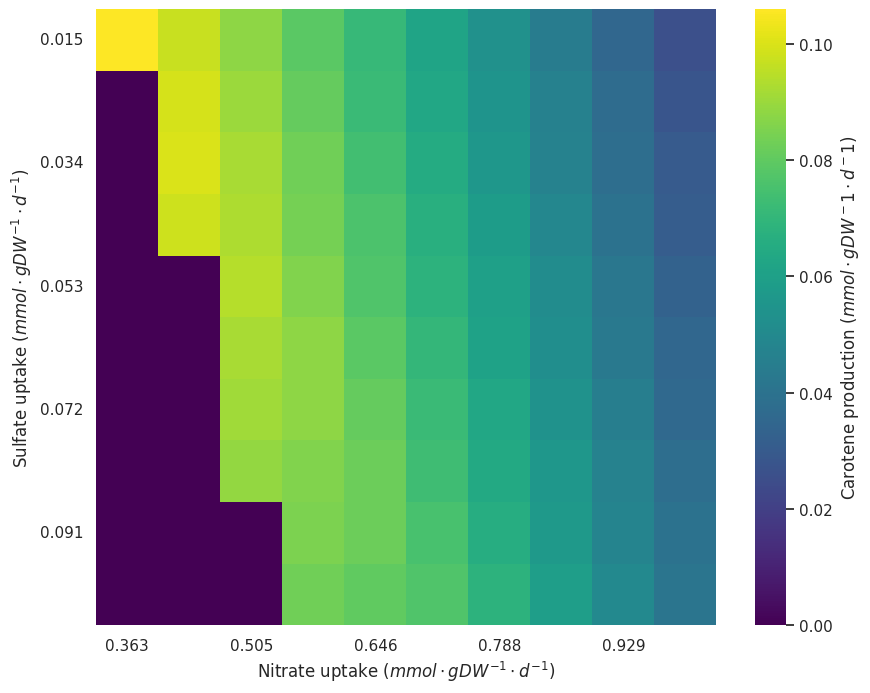

In [4]:
with original_model as model_max_carotenoid:
    model_max_carotenoid.exchanges.EX_C00244__dra.bounds = (-1,1000)
    model_max_carotenoid.demands.DM_C00244__cytop.bounds = (0,0)
    model_max_carotenoid.demands.DM_C00404__vacu.bounds = (0,0)
    model_max_carotenoid.exchanges.EX_C00533__dra.bounds = (0,0)
    model_max_carotenoid.exchanges.EX_C00014__dra.bounds = (0,0)
    model_max_carotenoid.exchanges.EX_C00009__dra.bounds = (-0.1,1000)
    model_max_carotenoid.exchanges.EX_C00059__dra.bounds = (-0.1,1000)
    model_max_carotenoid.reactions.e_Biomass__cytop.bounds = (0.14, 1000)
    model_max_carotenoid.exchanges.EX_C00205__dra.bounds = (-200,1000)
    model_max_carotenoid.reactions.EX_C00011__dra.bounds = (-10, 1000)
    
    constraint = model_max_carotenoid.problem.Constraint(
            model_max_carotenoid.reactions.EX_C00205__dra.flux_expression + model_max_carotenoid.reactions.R09542_hn437__chlo.flux_expression + 
        model_max_carotenoid.reactions.R09542_hn680__chlo.flux_expression
        +model_max_carotenoid.reactions.R09503_hn438__lum.flux_expression*4 + model_max_carotenoid.reactions.R09503_hn673__lum.flux_expression*4,
            lb=0,
            ub=0)
    model_max_carotenoid.add_cons_vars(constraint)
    constraint = model_max_carotenoid.problem.Constraint(
                model_max_carotenoid.reactions.R09503_hn438__lum.flux_expression + model_max_carotenoid.reactions.R09503_hn673__lum.flux_expression,
                lb=0,
                ub=199.44)
    model_max_carotenoid.add_cons_vars(constraint)
    reactions_map = {"EX_C00205__dra": "photon uptake", "EX_C00244__dra": "Nitrate uptake", 
                         "EX_C00009__dra": "Phosphate uptake", "EX_C00011__dra": "CO2 uptake",
                         "EX_C00059__dra": "Sulfate uptake",
                         "DM_C02094__chlo": "Carotene production", "DM_C08601__chlo": "Lutein production"
                    }
    nutrients = {
                "EX_C00205__dra",
                 "EX_C00244__dra",
                 "EX_C00009__dra",
                 "EX_C00011__dra", "EX_C00059__dra"}
    objectives = {"DM_C02094__chlo",
                  "DM_C08601__chlo"}
    for objective in objectives:
        for combination in combinations(nutrients, 2):
            print(objective, combination)
            production_env_plot(model_max_carotenoid, reactions_map,  combination[0], combination[1], objective,
                               "max_carotenoid")

e_Biomass__cytop ('EX_C00205__dra', 'EX_C00011__dra')
e_Biomass__cytop ('EX_C00205__dra', 'DM_C08601__chlo')
e_Biomass__cytop ('EX_C00205__dra', 'EX_C00009__dra')
e_Biomass__cytop ('EX_C00205__dra', 'EX_C00244__dra')
e_Biomass__cytop ('EX_C00205__dra', 'DM_C02094__chlo')
e_Biomass__cytop ('EX_C00205__dra', 'EX_C00059__dra')
e_Biomass__cytop ('EX_C00011__dra', 'DM_C08601__chlo')
e_Biomass__cytop ('EX_C00011__dra', 'EX_C00009__dra')
e_Biomass__cytop ('EX_C00011__dra', 'EX_C00244__dra')
e_Biomass__cytop ('EX_C00011__dra', 'DM_C02094__chlo')
e_Biomass__cytop ('EX_C00011__dra', 'EX_C00059__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00009__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00244__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'DM_C02094__chlo')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00059__dra')
e_Biomass__cytop ('EX_C00009__dra', 'EX_C00244__dra')
e_Biomass__cytop ('EX_C00009__dra', 'DM_C02094__chlo')
e_Biomass__cytop ('EX_C00009__dra', 'EX_C00059__dra')
e_Biomass__cytop (

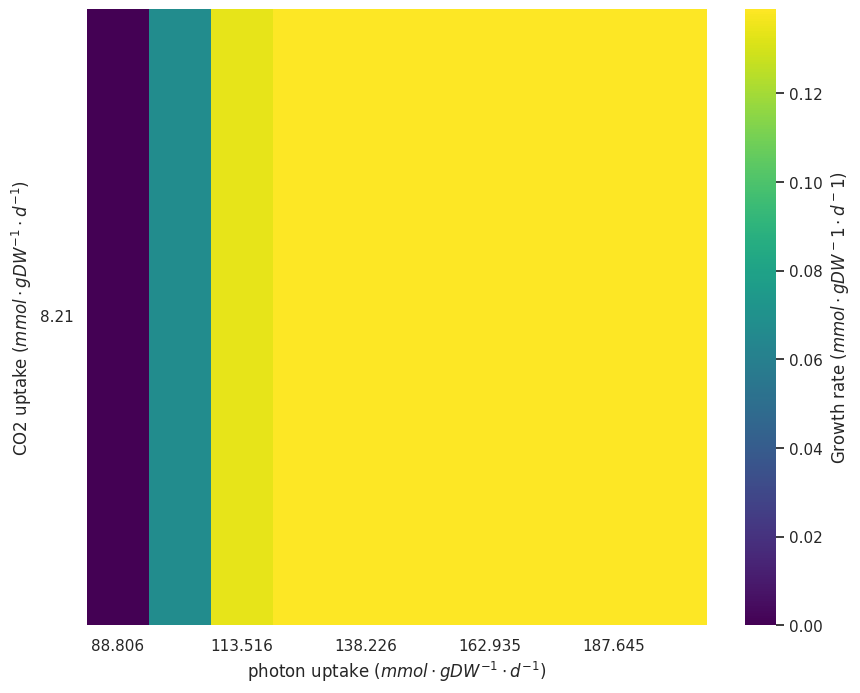

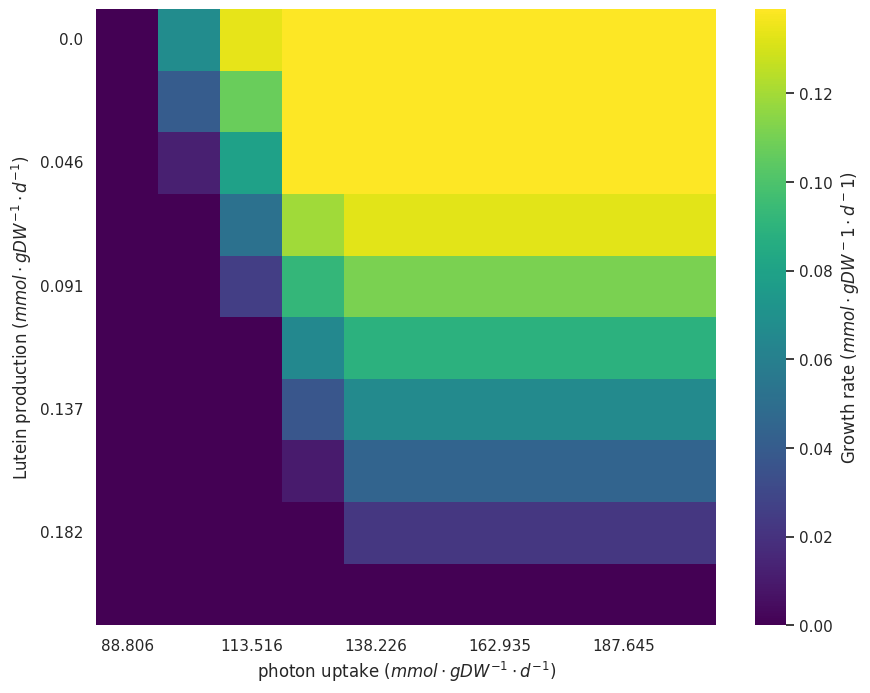

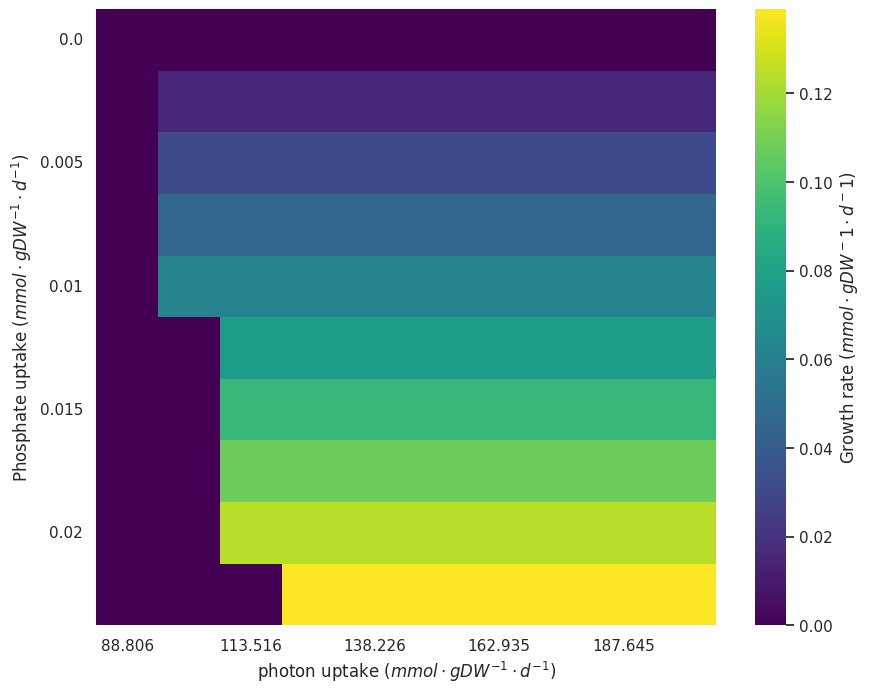

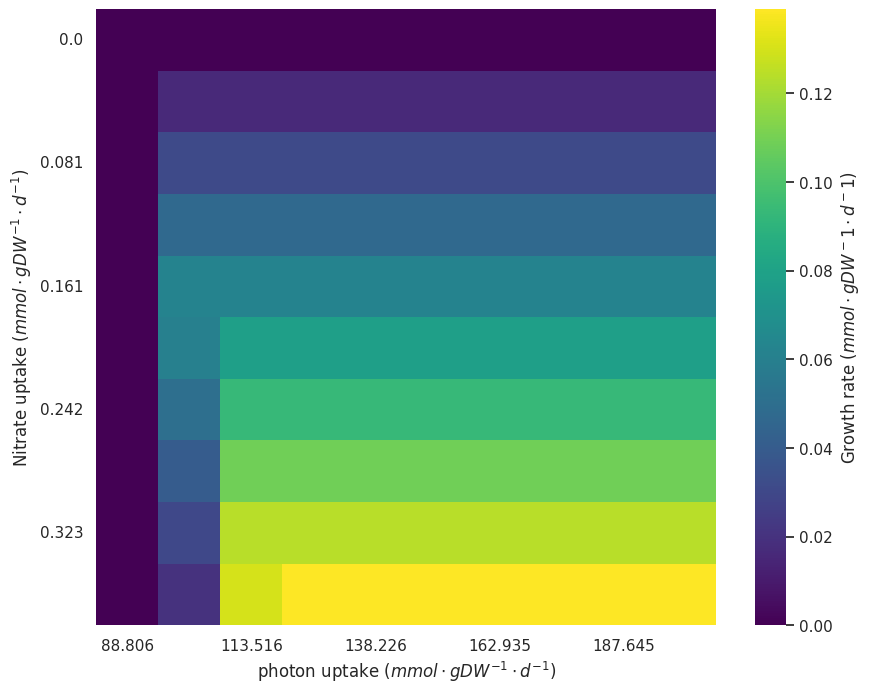

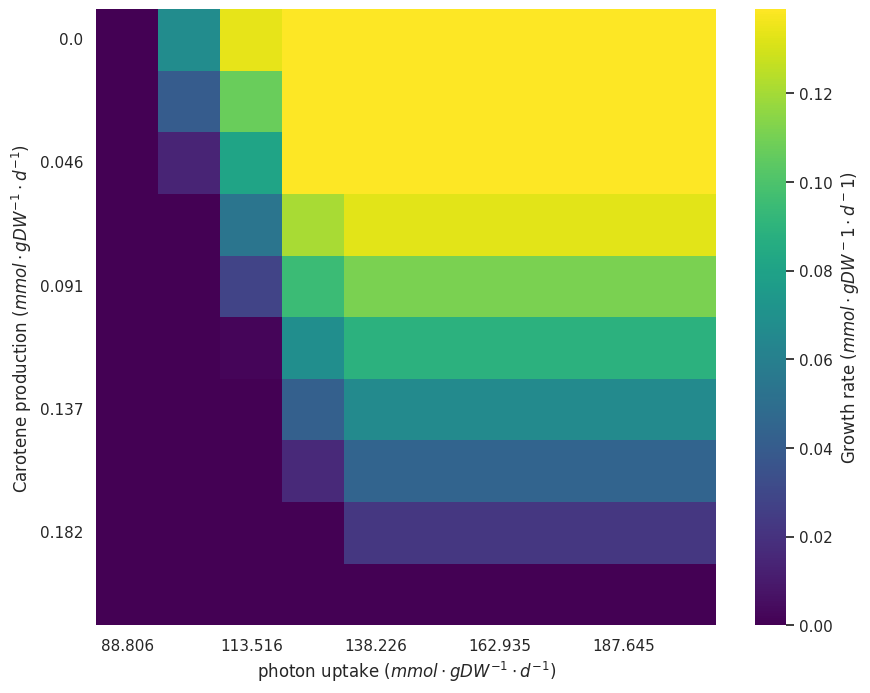

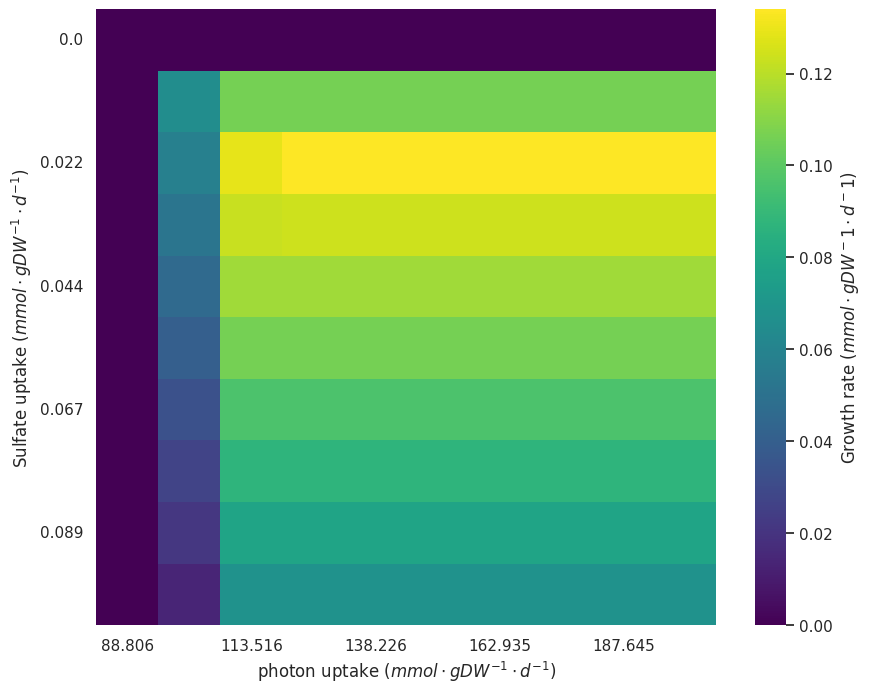

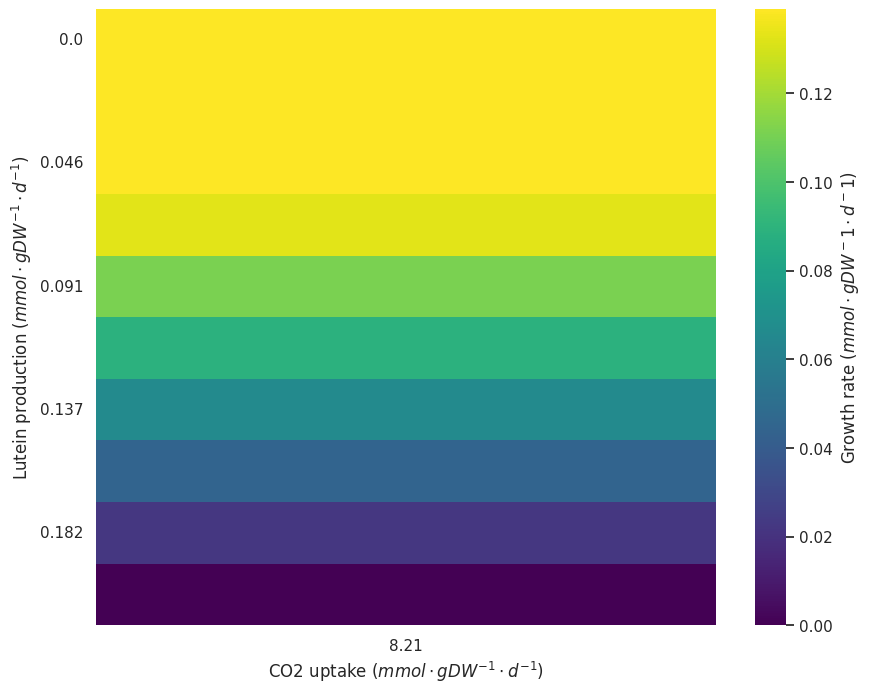

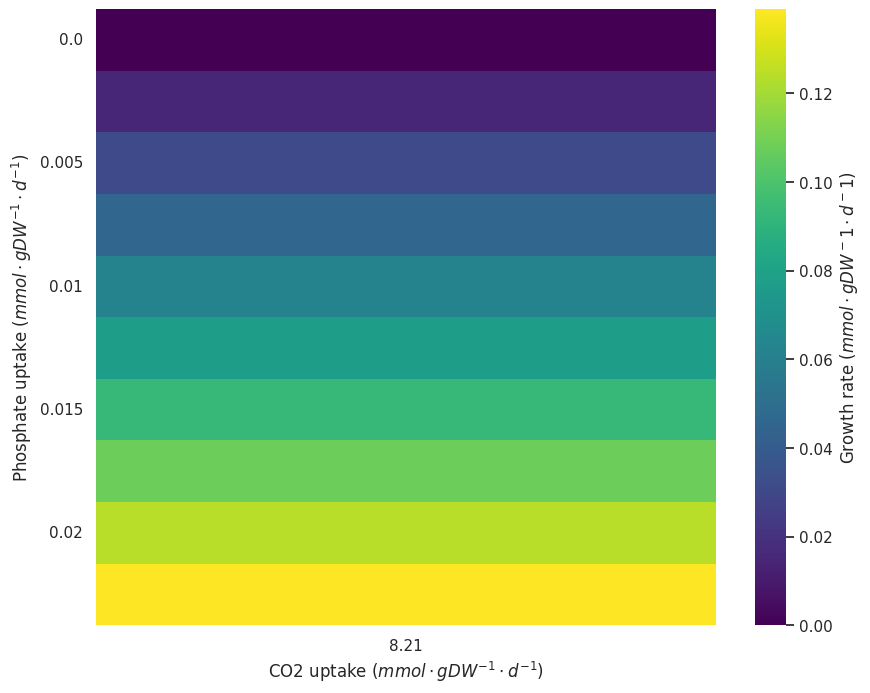

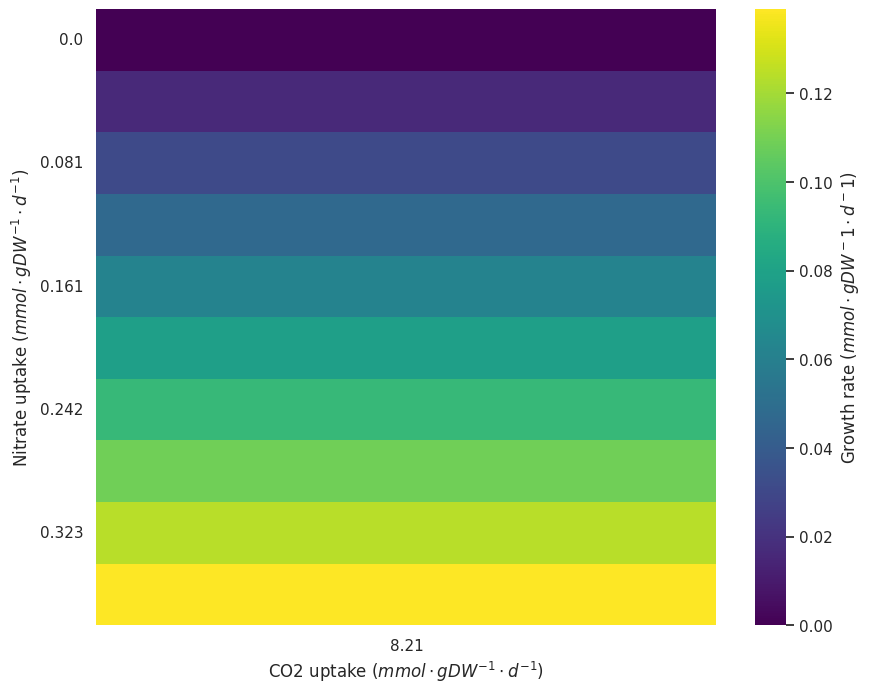

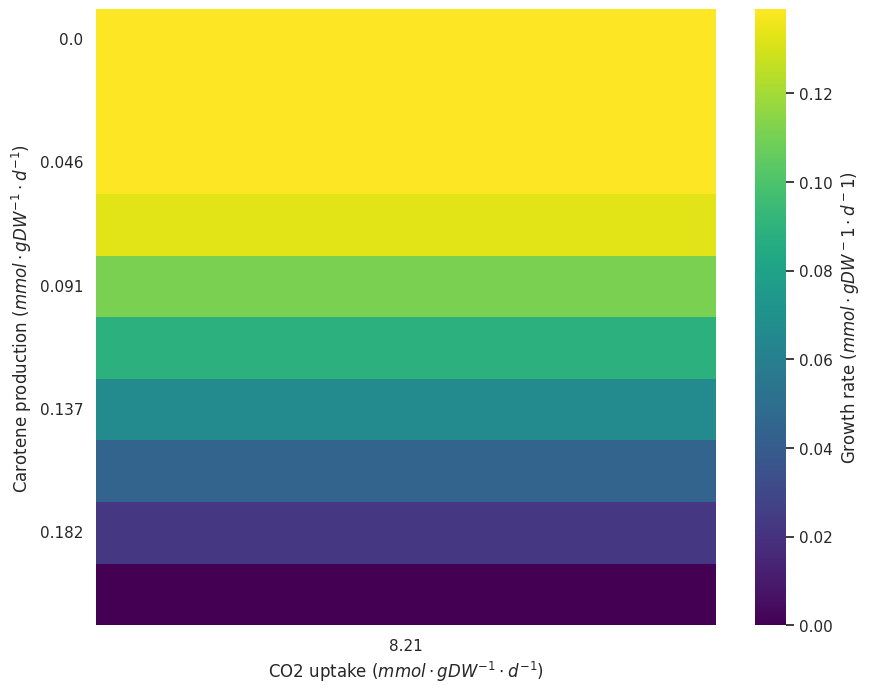

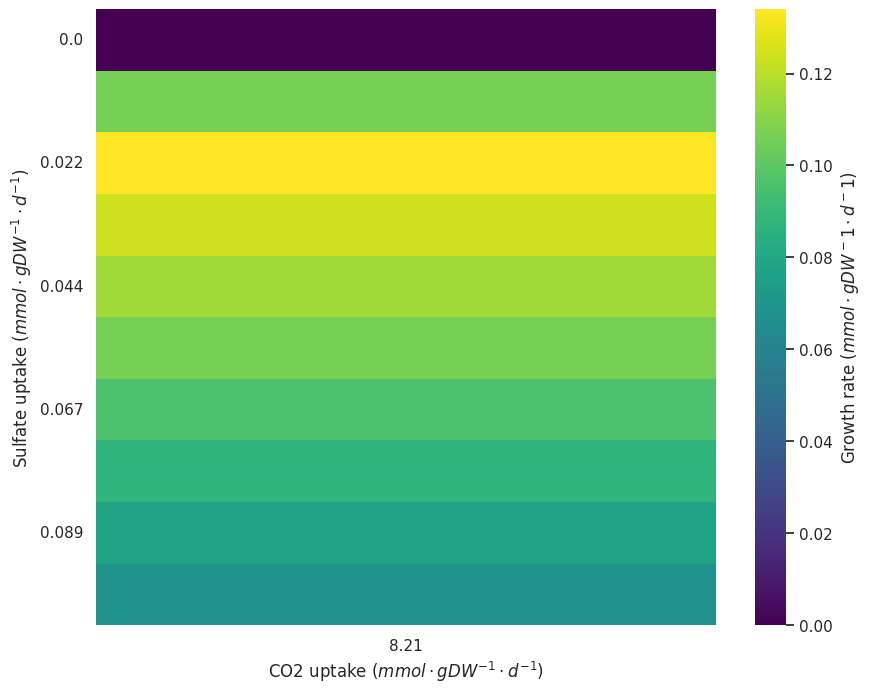

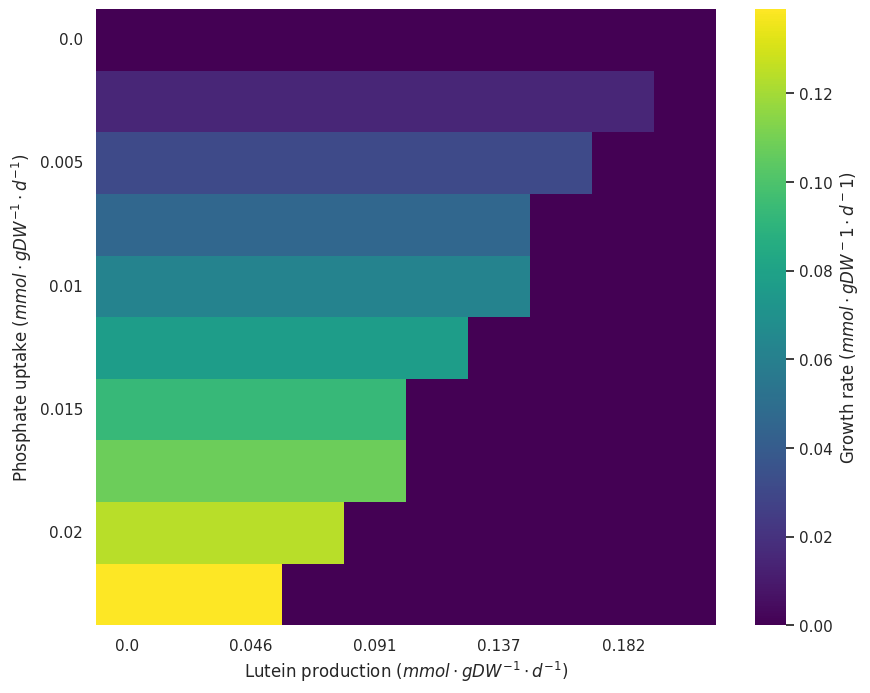

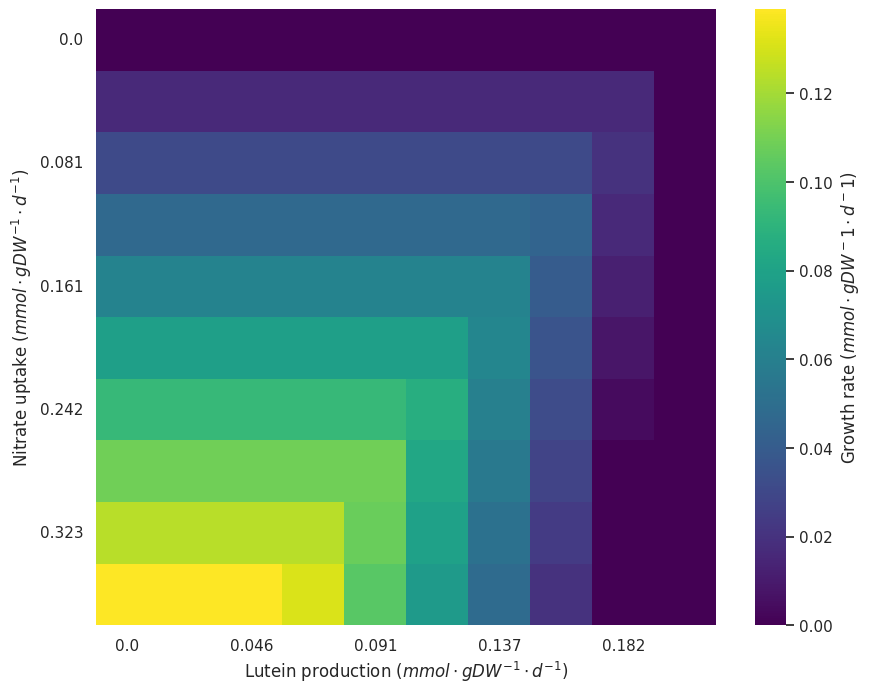

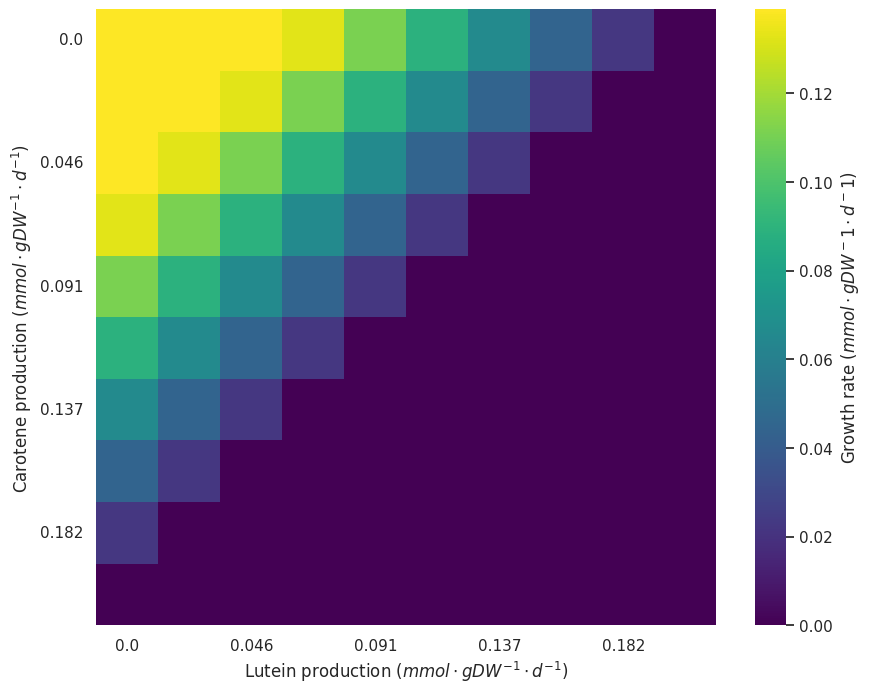

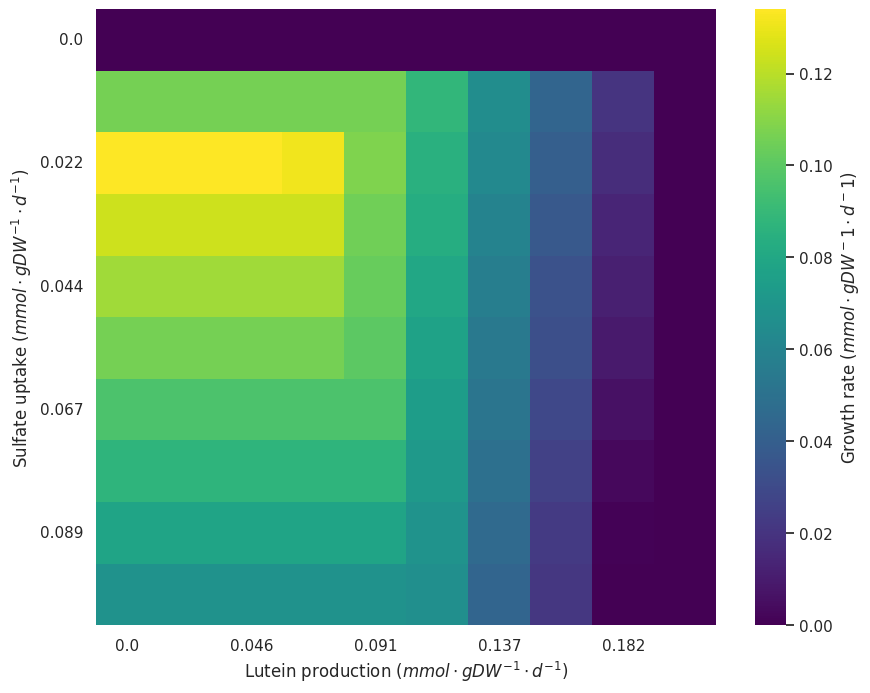

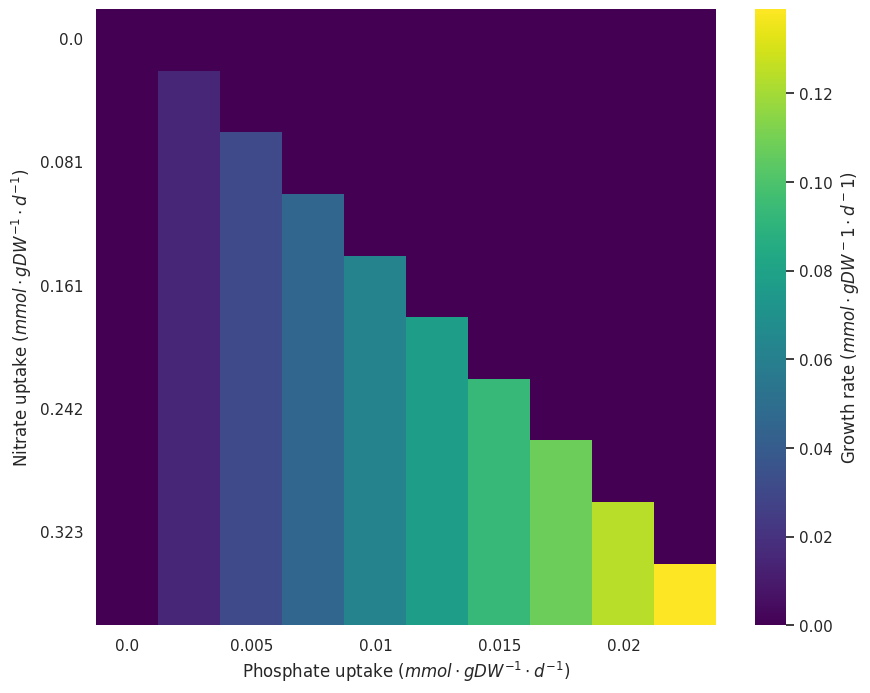

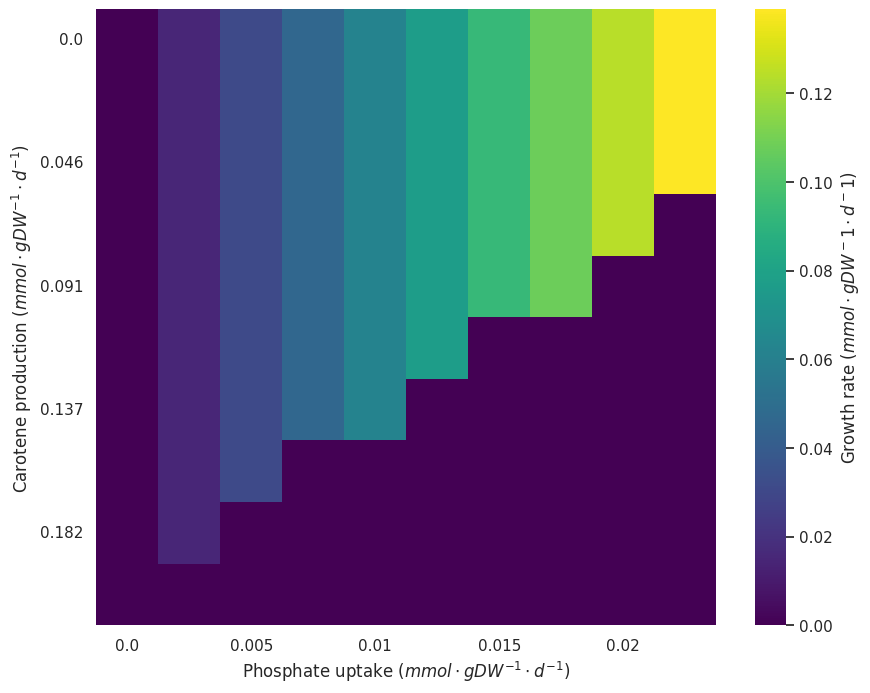

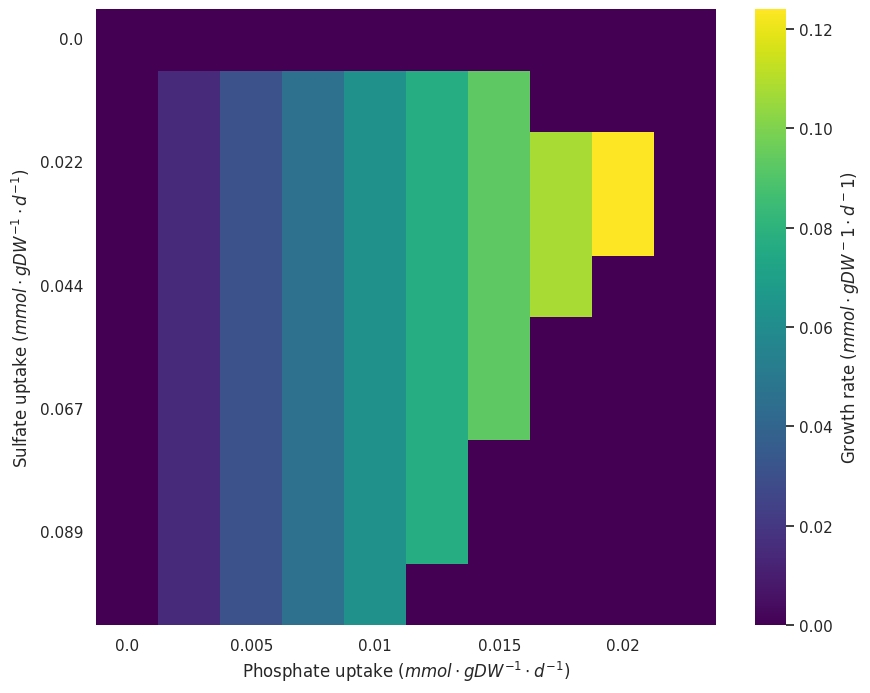

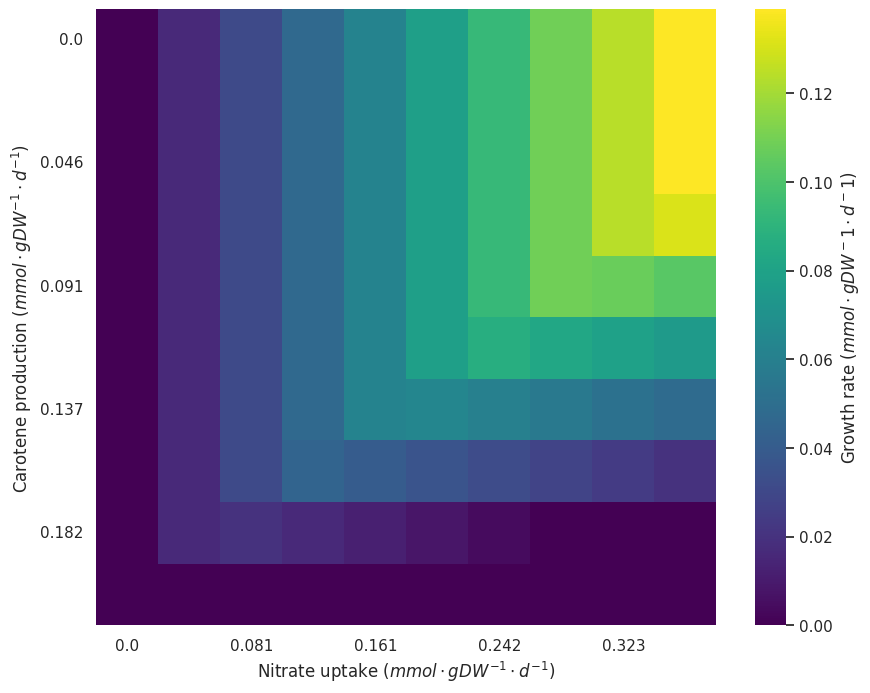

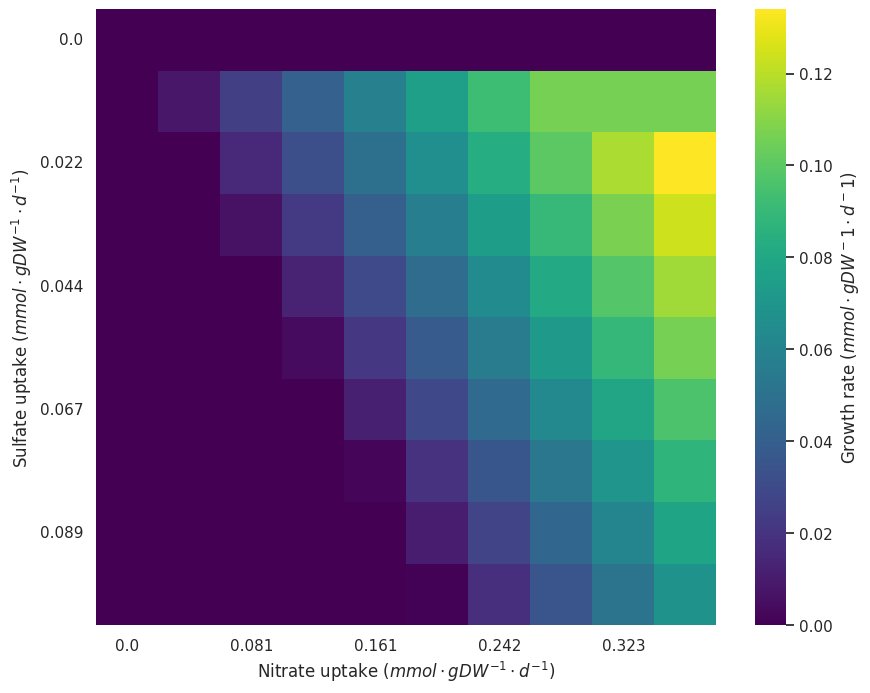

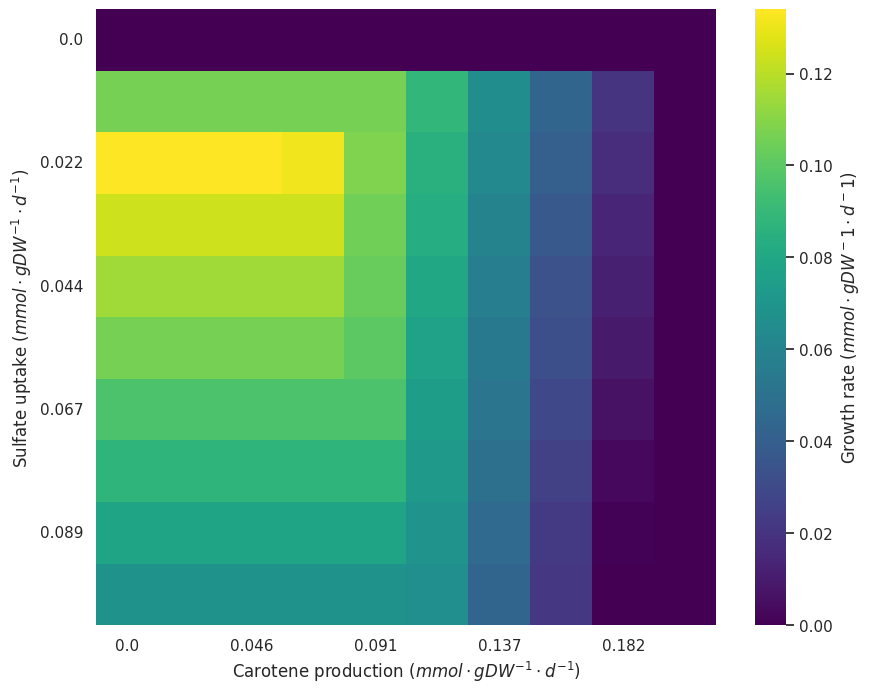

In [5]:
with original_model as  model_max_biomass:
    model_max_biomass.exchanges.EX_C00244__dra.bounds = (-0.363,1000)
    model_max_biomass.demands.DM_C00244__cytop.bounds = (0,0)
    model_max_biomass.demands.DM_C00404__vacu.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00533__dra.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00014__dra.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00009__dra.bounds = (-0.022,1000)
    model_max_biomass.exchanges.EX_C00059__dra.bounds = (-0.1,1000)
    model_max_biomass.exchanges.EX_C00205__dra.bounds = (-200,1000)
    model_max_biomass.reactions.EX_C00011__dra.bounds = (-8.21, -8.21)
    constraint = model_max_biomass.problem.Constraint(
            model_max_biomass.reactions.EX_C00205__dra.flux_expression + model_max_biomass.reactions.R09542_hn437__chlo.flux_expression + 
        model_max_biomass.reactions.R09542_hn680__chlo.flux_expression
        +model_max_biomass.reactions.R09503_hn438__lum.flux_expression*4 + model_max_biomass.reactions.R09503_hn673__lum.flux_expression*4,
            lb=0,
            ub=0)
    model_max_biomass.add_cons_vars(constraint)
    constraint = model_max_biomass.problem.Constraint(
                model_max_biomass.reactions.R09503_hn438__lum.flux_expression + model_max_biomass.reactions.R09503_hn673__lum.flux_expression,
                lb=0,
                ub=199.44)
    model_max_biomass.add_cons_vars(constraint)
    reactions_map = {"EX_C00205__dra": "photon uptake", "EX_C00244__dra": "Nitrate uptake", 
                         "EX_C00009__dra": "Phosphate uptake", "EX_C00011__dra": "CO2 uptake",
                         "EX_C00059__dra": "Sulfate uptake",
                         "DM_C02094__chlo": "Carotene production", "DM_C08601__chlo": "Lutein production",
                    "e_Biomass__cytop": "Growth rate"}
    nutrients = {
        "EX_C00205__dra", 
                 "EX_C00244__dra", "EX_C00009__dra", "EX_C00011__dra", "EX_C00059__dra",
                "DM_C02094__chlo", "DM_C08601__chlo"}
    objectives = {"e_Biomass__cytop"}
    for objective in objectives:
        for combination in combinations(nutrients, 2):
            print(objective, combination)
            production_env_plot(model_max_carotenoid, reactions_map,  combination[0], combination[1], objective,
                               "max_biomass")

In [6]:
with original_model as  model_max_biomass:
    model_max_biomass.exchanges.EX_C00244__dra.bounds = (-1,1000)
    model_max_biomass.demands.DM_C00244__cytop.bounds = (0,0)
    model_max_biomass.demands.DM_C00404__vacu.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00533__dra.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00014__dra.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00009__dra.bounds = (-0.1,1000)
    model_max_biomass.exchanges.EX_C00059__dra.bounds = (-1000,1000)
    model_max_biomass.reactions.e_Biomass__cytop.bounds = (0.14,1000)
    model_max_biomass.exchanges.EX_C00205__dra.bounds = (-130,1000)
    model_max_biomass.reactions.EX_C00011__dra.bounds = (-8.21, 1000)
    constraint = model_max_biomass.problem.Constraint(
            model_max_biomass.reactions.EX_C00205__dra.flux_expression + model_max_biomass.reactions.R09542_hn437__chlo.flux_expression + 
        model_max_biomass.reactions.R09542_hn680__chlo.flux_expression
        +model_max_biomass.reactions.R09503_hn438__lum.flux_expression*4 + model_max_biomass.reactions.R09503_hn673__lum.flux_expression*4,
            lb=0,
            ub=0)
    model_max_biomass.add_cons_vars(constraint)
    constraint = model_max_biomass.problem.Constraint(
                model_max_biomass.reactions.R09503_hn438__lum.flux_expression + model_max_biomass.reactions.R09503_hn673__lum.flux_expression,
                lb=0,
                ub=199.44)
    model_max_biomass.add_cons_vars(constraint)
    model_max_biomass.objective = model_max_biomass.reactions.DM_C02094__chlo.flux_expression + \
        model_max_biomass.reactions.DM_C08601__chlo.flux_expression
    photon_range = range(80, 210, 10)
    for photon_up in photon_range:
        model_max_biomass.exchanges.EX_C00205__dra.bounds = (-photon_up,1000)
        try:
            fva_sol = fva(model_max_biomass, ["DM_C02094__chlo", "DM_C08601__chlo", "e_Biomass__cytop"], 
                      fraction_of_optimum = 1.0)
            print(photon_up)
            print(fva_sol)
            print("#"*100)
        except:
            pass

100
                   minimum       maximum
DM_C02094__chlo   0.003704  3.704138e-03
DM_C08601__chlo   0.000000  4.088353e-10
e_Biomass__cytop  0.140000  1.400000e-01
####################################################################################################
110
                   minimum       maximum
DM_C02094__chlo   0.024326  2.432597e-02
DM_C08601__chlo   0.000000  1.614528e-10
e_Biomass__cytop  0.140000  1.400000e-01
####################################################################################################
120
                   minimum       maximum
DM_C02094__chlo   0.044948  4.494779e-02
DM_C08601__chlo   0.000000  2.069275e-10
e_Biomass__cytop  0.140000  1.400000e-01
####################################################################################################
130
                  minimum   maximum
DM_C02094__chlo      0.00  0.061202
DM_C08601__chlo      0.00  0.061202
e_Biomass__cytop     0.14  0.140000
#############################################